In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = '/Users/venkatabhargavmudda/Downloads/Telco-Customer-Churn.csv'
data = pd.read_csv(file_path)

In [3]:
# Define the Problem
objective = "Predict which customers are at risk of churning."
target_variable = "Churn"

In [4]:
# Collect and Prepare Data
# Inspect the first few rows of the dataset
print(data.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [5]:
# Check the data types and look for missing values
data_info = data.info()
print(data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
missing_values = data.isnull().sum()
print(missing_values)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [7]:
# Exploratory Data Analysis (EDA)
# Analyze the distribution of features and the target variable
distribution = data.describe()
print(distribution)

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [12]:
# Convert 'TotalCharges' from object to numeric (float)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
# Check for any missing values created as a result of the conversion
print(data['TotalCharges'].isnull().sum())


11


In [13]:
# Fill missing 'TotalCharges' with the mean of the column
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)
print(data['TotalCharges'].isnull().sum())

0


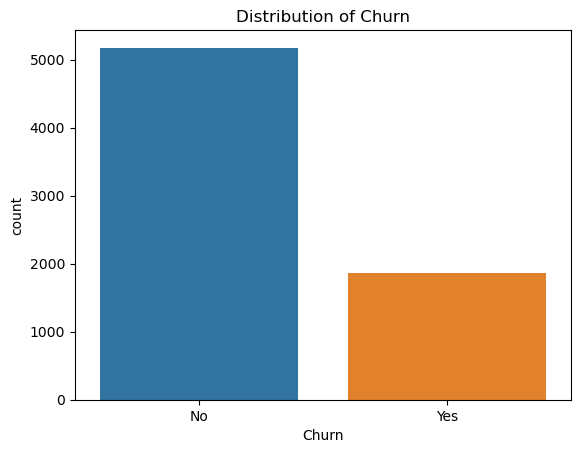

In [14]:
#Exploratory Data Analysis (EDA)
# Distribution of the target variable 'Churn'
sns.countplot(x='Churn', data=data)
plt.title('Distribution of Churn')
plt.show()

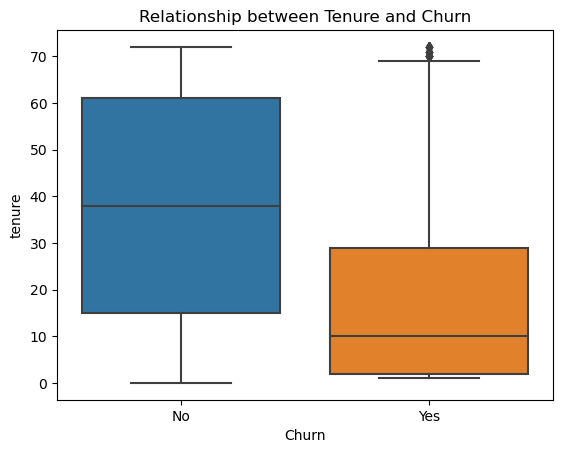

In [15]:
# Relationship between 'tenure' and 'Churn'
sns.boxplot(x='Churn', y='tenure', data=data)
plt.title('Relationship between Tenure and Churn')
plt.show()

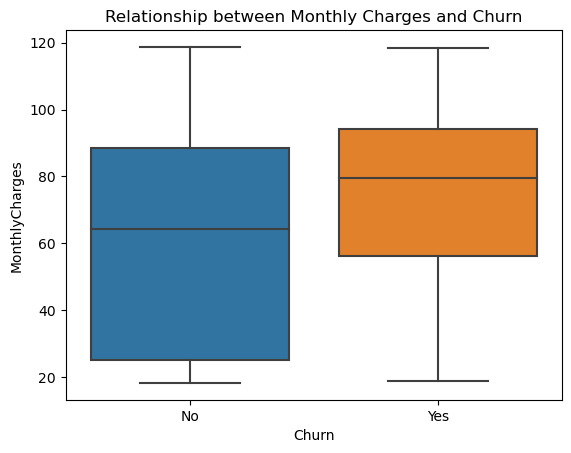

In [16]:
# Relationship between 'MonthlyCharges' and 'Churn'
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title('Relationship between Monthly Charges and Churn')
plt.show()

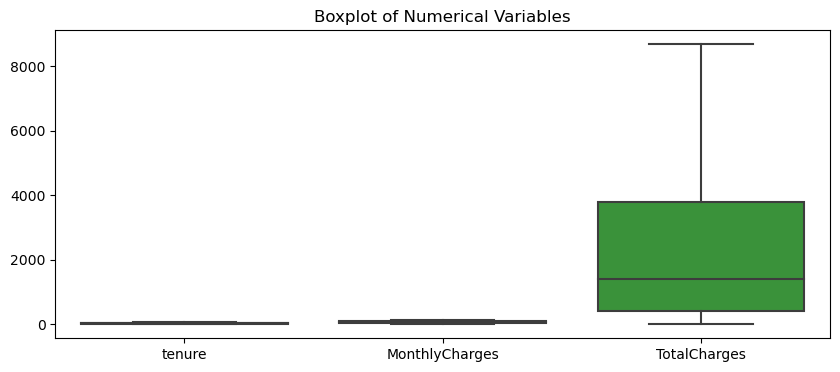

In [17]:
# Visualizing Outliers
plt.figure(figsize=(10, 4))
sns.boxplot(data=data[['tenure', 'MonthlyCharges', 'TotalCharges']])
plt.title('Boxplot of Numerical Variables')
plt.show()

In [18]:
# Convert 'SeniorCitizen' to a Categorical Variable
data['SeniorCitizen'] = data['SeniorCitizen'].map({1: 'Yes', 0: 'No'})

In [19]:
# Summary Statistics for Categorical Features
categorical_features_summary = data.describe(include=[object])
print(categorical_features_summary)

        customerID gender SeniorCitizen Partner Dependents PhoneService  \
count         7043   7043          7043    7043       7043         7043   
unique        7043      2             2       2          2            2   
top     7590-VHVEG   Male            No      No         No          Yes   
freq             1   3555          5901    3641       4933         6361   

       MultipleLines InternetService OnlineSecurity OnlineBackup  \
count           7043            7043           7043         7043   
unique             3               3              3            3   
top               No     Fiber optic             No           No   
freq            3390            3096           3498         3088   

       DeviceProtection TechSupport StreamingTV StreamingMovies  \
count              7043        7043        7043            7043   
unique                3           3           3               3   
top                  No          No          No              No   
freq           

In [20]:
# Distribution of the Target Variable 'Churn'
churn_distribution = data['Churn'].value_counts(normalize=True)
print(churn_distribution)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


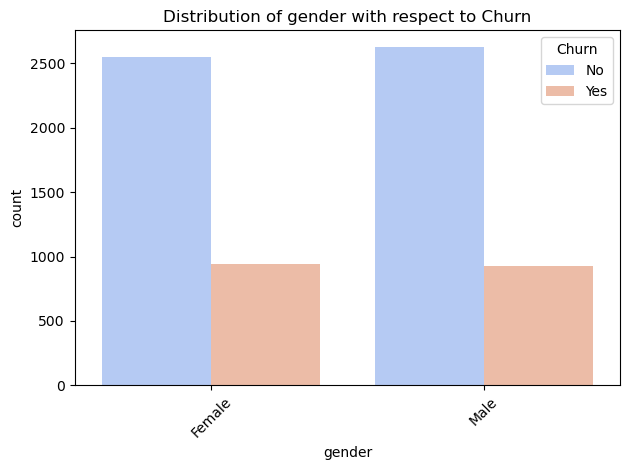

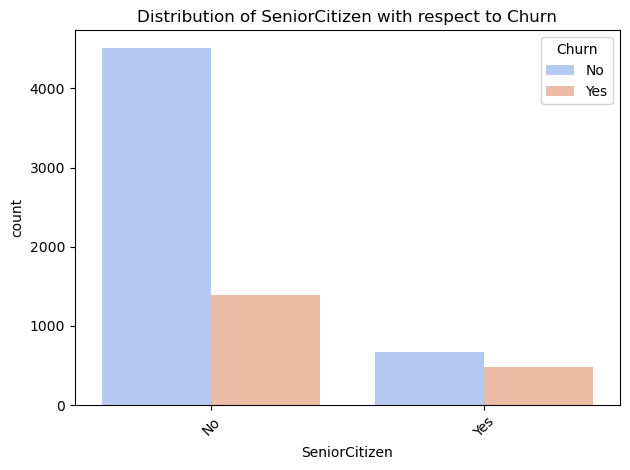

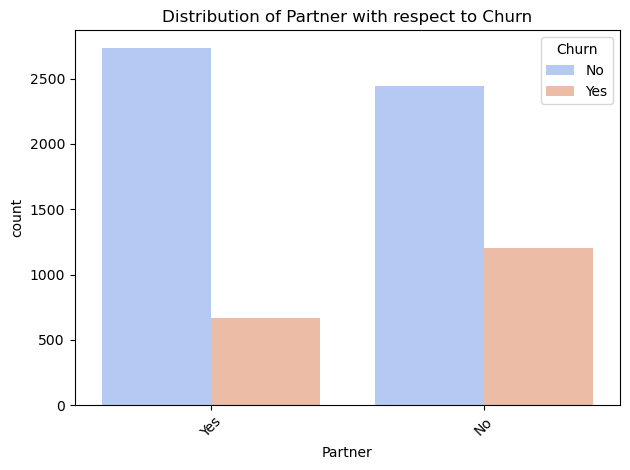

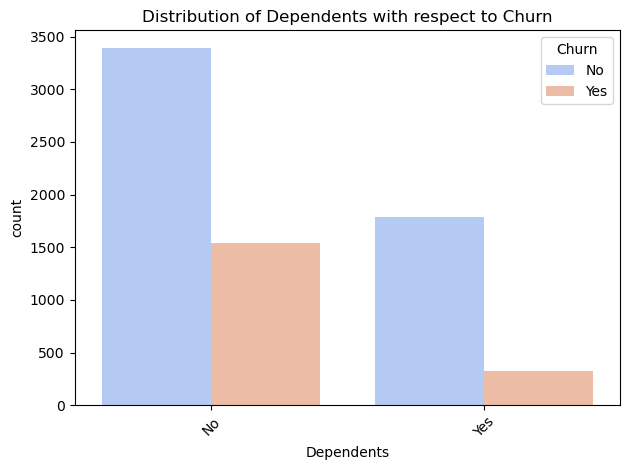

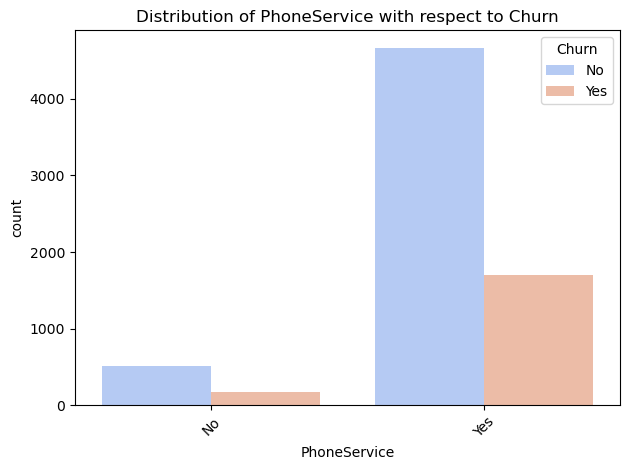

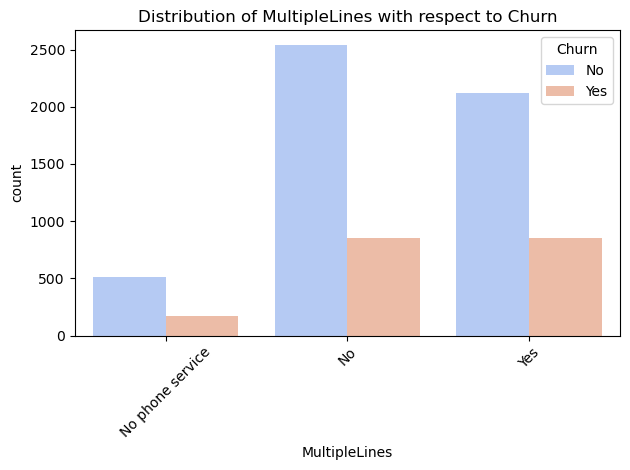

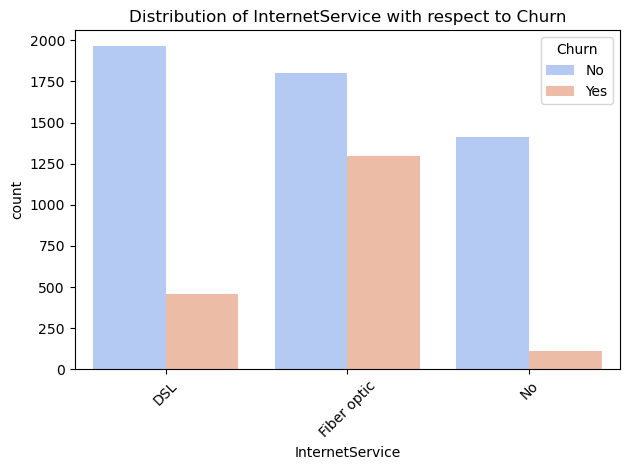

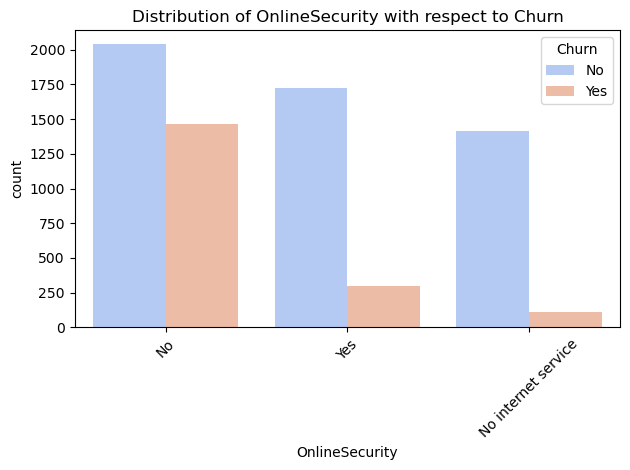

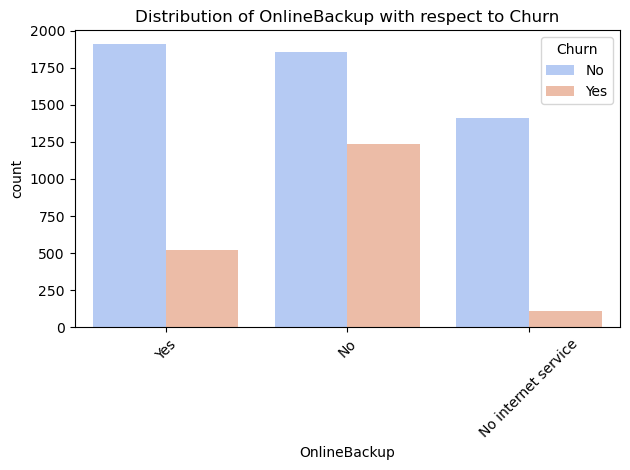

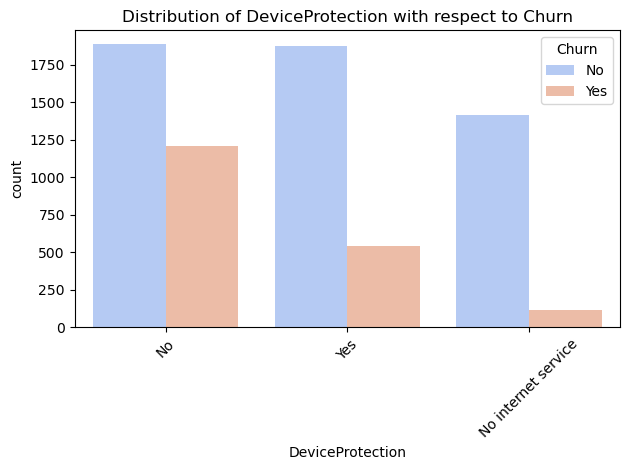

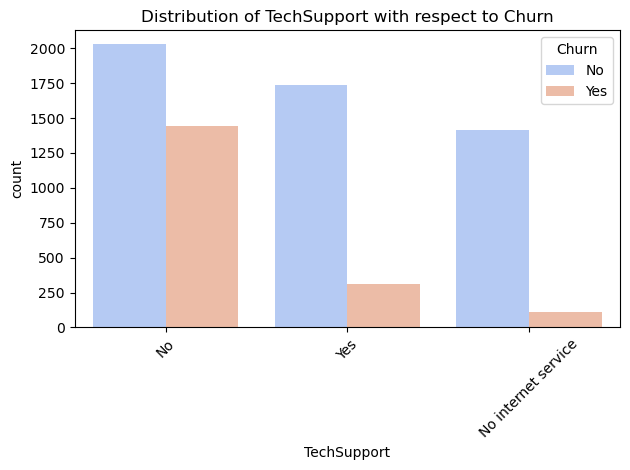

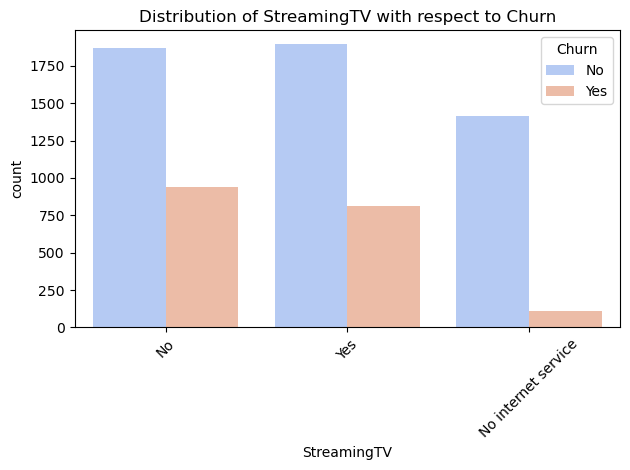

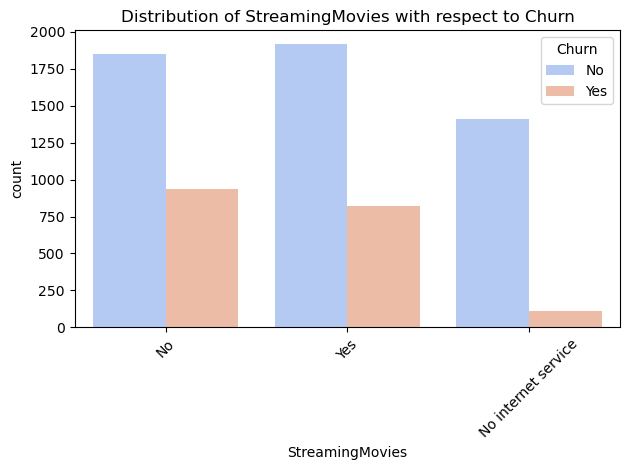

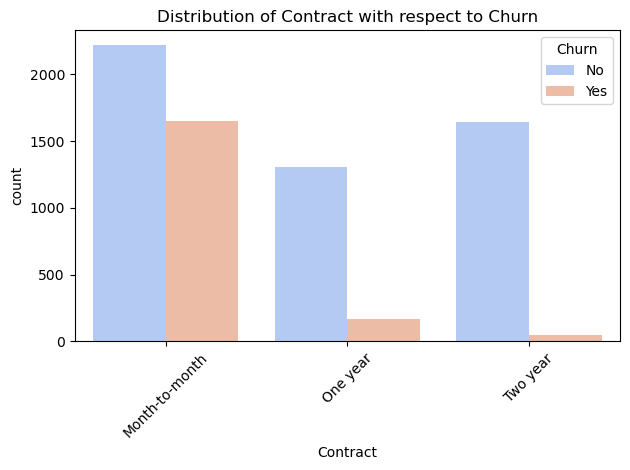

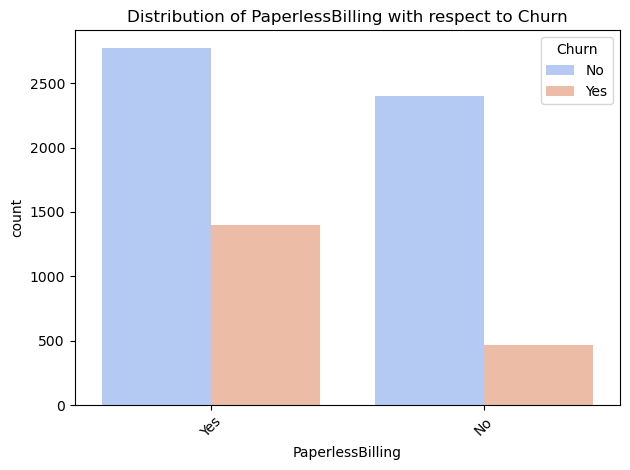

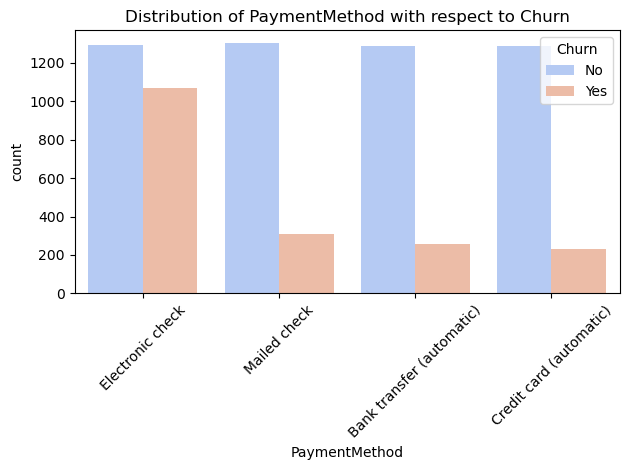

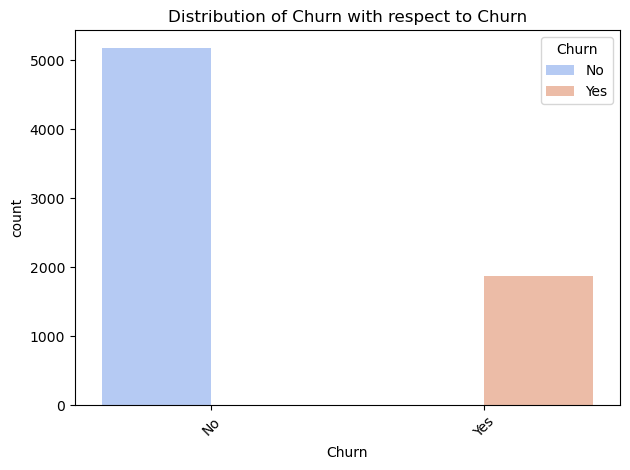

In [24]:
# Visualize Distribution of Categorical Features with Respect to Churn
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('customerID')  # CustomerID is not useful for EDA

for column in categorical_columns:
    #plt.figure(figsize=(10, 4))
    sns.countplot(x=column, hue='Churn', data=data, palette='coolwarm')
    plt.title(f'Distribution of {column} with respect to Churn')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

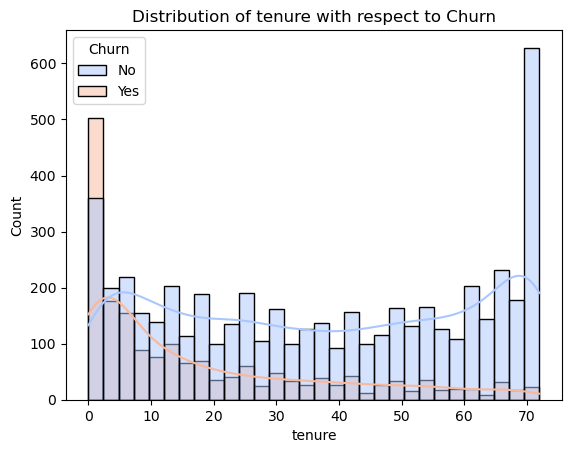

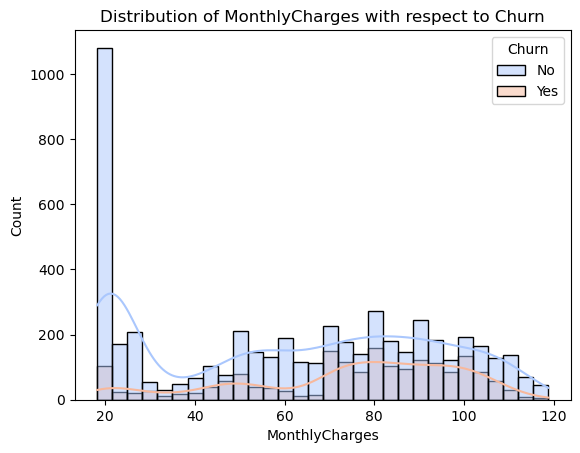

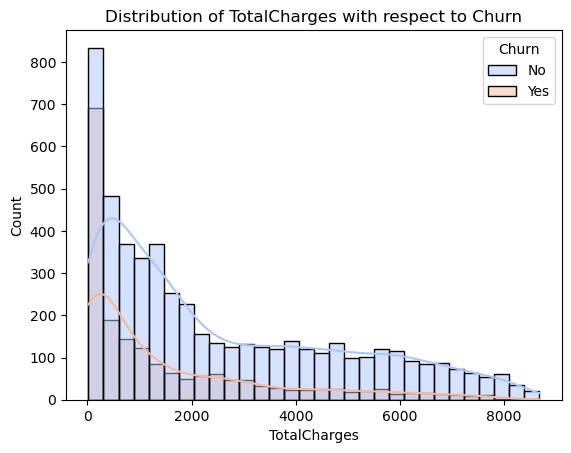

In [27]:
# Visualize Distribution of Numerical Features with Respect to Churn
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

for column in numerical_columns:
    #plt.figure(figsize=(10, 4))
    sns.histplot(data=data, x=column, hue='Churn', kde=True, palette='coolwarm', bins=30)
    plt.title(f'Distribution of {column} with respect to Churn')
    plt.show()

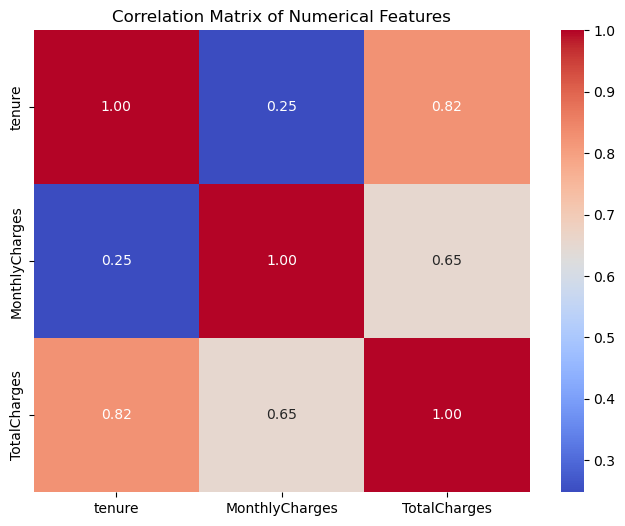

In [28]:
# Correlation Matrix of Numerical Features
correlation_matrix = data[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [30]:
# Feature Engineering - Creating New Features
# Here you might want to create new features based on domain knowledge. As an example:
# - If you have monthly usage data, you could calculate the average usage over the last few months.
# - You could also create a feature for the change in usage patterns.
# For this dataset, we don't have monthly usage data, so let's create a feature that captures the ratio of TotalCharges to tenure as 'average_charge_per_tenure'.
import numpy as np
data['average_charge_per_tenure'] = data['TotalCharges'] / data['tenure']
data['average_charge_per_tenure'].replace([np.inf, -np.inf], 0, inplace=True)  # Replace infinite values with 0

In [31]:
# Encoding Categorical Variables
# We'll use one-hot encoding to convert categorical variables into a form that could be provided to ML algorithms.
# Note: In a real-world scenario, consider the cardinality of each variable before deciding on one-hot encoding.
categorical_columns.remove('Churn')  # We'll exclude the target variable from one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [34]:
# Normalizing Numerical Features
# For some models, it might be helpful to scale numerical features.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'average_charge_per_tenure']
data_encoded[numerical_features] = scaler.fit_transform(data_encoded[numerical_features])

# Display the first few rows of the data with the new features and encoding
print(data_encoded.head())

   customerID    tenure  MonthlyCharges  TotalCharges Churn  \
0  7590-VHVEG -1.277445       -1.160323     -0.994971    No   
1  5575-GNVDE  0.066327       -0.259629     -0.173876    No   
2  3668-QPYBK -1.236724       -0.362660     -0.960399   Yes   
3  7795-CFOCW  0.514251       -0.746535     -0.195400    No   
4  9237-HQITU -1.236724        0.197365     -0.941193   Yes   

   average_charge_per_tenure  gender_Male  SeniorCitizen_Yes  Partner_Yes  \
0                  -1.151302        False              False         True   
1                  -0.301458         True              False        False   
2                  -0.350966         True              False        False   
3                  -0.786053         True              False        False   
4                   0.367602        False              False        False   

   Dependents_Yes  ...  StreamingTV_No internet service  StreamingTV_Yes  \
0           False  ...                            False            False   
1     

In [36]:
# Check the Column Names of the Encoded DataFrame
print(data_encoded.columns)


Index(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'average_charge_per_tenure', 'gender_Male', 'SeniorCitizen_Yes',
       'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [37]:
# Updated Split the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

# Define the features and target variable
X = data_encoded.drop(['Churn', 'customerID'], axis=1)  # Drop the target variable and customerID
y = data_encoded['Churn']  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the resulting sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (5634, 31)
Testing set shape: (1409, 31)


In [38]:
# Import Classification Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [41]:
# Initialize and Train Models
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# Print a message to indicate training is complete
print("Models have been trained.")

Models have been trained.


In [42]:
# Import Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [48]:
# Updated Define a Function to Evaluate Models
def evaluate_model(model, X_test, y_test):
    # Make predictions on the testing set
    y_pred = model.predict(X_test)
    
    # Convert 'Yes'/'No' to 1/0 for evaluation metrics
    y_test_binary = (y_test == 'Yes').astype(int)
    y_pred_binary = (y_pred == 'Yes').astype(int)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test_binary, y_pred_binary)
    precision = precision_score(y_test_binary, y_pred_binary)
    recall = recall_score(y_test_binary, y_pred_binary)
    f1 = f1_score(y_test_binary, y_pred_binary)
    roc_auc = roc_auc_score(y_test_binary, y_pred_binary)
    
    # Print the metrics
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC-AUC: {roc_auc:.2f}")
    print("-" * 30)


In [47]:
# Re-run the Evaluation for Each Model
evaluate_model(logreg, X_test, y_test)
evaluate_model(dtree, X_test, y_test)
evaluate_model(rf, X_test, y_test)
evaluate_model(gb, X_test, y_test)

Model: LogisticRegression
Accuracy: 0.82
Precision: 0.69
Recall: 0.60
F1 Score: 0.64
ROC-AUC: 0.75
------------------------------
Model: DecisionTreeClassifier
Accuracy: 0.72
Precision: 0.47
Recall: 0.49
F1 Score: 0.48
ROC-AUC: 0.65
------------------------------
Model: RandomForestClassifier
Accuracy: 0.81
Precision: 0.68
Recall: 0.50
F1 Score: 0.57
ROC-AUC: 0.71
------------------------------
Model: GradientBoostingClassifier
Accuracy: 0.81
Precision: 0.68
Recall: 0.54
F1 Score: 0.60
ROC-AUC: 0.72
------------------------------


In [52]:
# Cell 27: Import Libraries for Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Cell 28: Updated Hyperparameter Tuning for Logistic Regression
# Define the updated parameter grid
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter': [100, 200, 300, 500, 1000]  # Increased max_iter options
}

# Initialize GridSearchCV with the updated parameter grid
grid_search_lr = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search_lr.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best Score for Logistic Regression:", grid_search_lr.best_score_)

# Cell 29: Train the Best Model with the Optimal Parameters
best_lr_model = LogisticRegression(**grid_search_lr.best_params_)
best_lr_model.fit(X_train, y_train)

# Cell 30: Re-evaluate the Tuned Logistic Regression Model
evaluate_model(best_lr_model, X_test, y_test)


/Users/venkatabhargavmudda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/venkatabhargavmudda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

Best Parameters for Logistic Regression: {'C': 10, 'max_iter': 100, 'solver': 'liblinear'}
Best Score for Logistic Regression: 0.8022721792400642
Model: LogisticRegression
Accuracy: 0.82
Precision: 0.69
Recall: 0.59
F1 Score: 0.64
ROC-AUC: 0.75
------------------------------


In [53]:
# Cell 31: Analyze Feature Importance for Logistic Regression
importance_lr = pd.DataFrame({'Feature': X.columns, 'Coefficient': best_lr_model.coef_[0]})
importance_lr['Odds Ratio'] = np.exp(importance_lr['Coefficient'])
importance_lr = importance_lr.sort_values(by='Odds Ratio', ascending=False)

# Display the top 10 features by odds ratio
print("Top 10 Features Influencing Customer Churn (Logistic Regression):")
print(importance_lr.head(10))


Top 10 Features Influencing Customer Churn (Logistic Regression):
                           Feature  Coefficient  Odds Ratio
11     InternetService_Fiber optic     1.691875    5.429651
2                     TotalCharges     0.664102    1.942745
24             StreamingMovies_Yes     0.644735    1.905481
22                 StreamingTV_Yes     0.546190    1.726662
10               MultipleLines_Yes     0.429017    1.535746
27            PaperlessBilling_Yes     0.332132    1.393937
29  PaymentMethod_Electronic check     0.320493    1.377807
3        average_charge_per_tenure     0.210249    1.233986
5                SeniorCitizen_Yes     0.160830    1.174485
18            DeviceProtection_Yes     0.145361    1.156457


In [55]:
# Cell 32: Updated Derive Insights
print("\nActionable Insights:")
print("1. Customers with fiber optic internet service are significantly more likely to churn. Consider improving the quality or pricing of this service.")
print("2. Total charges and average charges per tenure are associated with higher churn rates. Review pricing strategies to ensure competitiveness and customer satisfaction.")
print("3. Customers who use streaming services (TV and movies) are more likely to churn. Explore bundling or promotional offers to retain these customers.")
print("4. Customers with multiple lines are more likely to churn. Investigate the reasons behind this and consider offering incentives for loyalty.")
print("5. Paperless billing and electronic payment methods are associated with higher churn. Ensure that these options are user-friendly and reliable.")
print("6. Senior citizens are slightly more likely to churn. Tailor services and support to meet the needs of this demographic.")
print("7. Customers with device protection plans are slightly more likely to churn. Evaluate the perceived value of this service.")
# Add more insights based on your analysis.



Actionable Insights:
1. Customers with fiber optic internet service are significantly more likely to churn. Consider improving the quality or pricing of this service.
2. Total charges and average charges per tenure are associated with higher churn rates. Review pricing strategies to ensure competitiveness and customer satisfaction.
3. Customers who use streaming services (TV and movies) are more likely to churn. Explore bundling or promotional offers to retain these customers.
4. Customers with multiple lines are more likely to churn. Investigate the reasons behind this and consider offering incentives for loyalty.
5. Paperless billing and electronic payment methods are associated with higher churn. Ensure that these options are user-friendly and reliable.
6. Senior citizens are slightly more likely to churn. Tailor services and support to meet the needs of this demographic.
7. Customers with device protection plans are slightly more likely to churn. Evaluate the perceived value of th